In [2]:
import os
import json
import cv2
import numpy as np
import albumentations as alb
import tensorflow as tf
import pickle

In [3]:
augmentor = alb.Compose(
    [
        alb.RandomCrop(width=450, height=450),
        alb.HorizontalFlip(p=0.5),
        alb.RandomBrightnessContrast(p=0.2),
        alb.RandomGamma(p=0.2),
        alb.RGBShift(p=0.2),
        alb.VerticalFlip(p=0.5),
    ],
    bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels'])
)

In [4]:
for partition in ['train', 'test', 'valid']:
    for image in os.listdir(os.path.join('split_data', partition, 'images')):
        img = cv2.imread(os.path.join(
            'split_data', partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(
            'split_data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(120):
                augmented = augmentor(
                    image=img, bboxes=[coords], class_labels=['Face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images',
                            f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
        except Exception as e:
            print(e)

In [5]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
dataset_dict = {}

for name in ['train', 'test', 'valid']:
    dataset = tf.data.Dataset.list_files(os.path.join('aug_data', name, 'images', '*.jpg'), shuffle=False)
    dataset = dataset.map(load_image)
    dataset = dataset.map(lambda img: tf.image.resize(img, (120, 120)))
    dataset = dataset.map(lambda img: img / 255.0)
    dataset_dict[name + '_images'] = dataset

In [7]:
train_images = dataset_dict['train_images']
test_images = dataset_dict['test_images']
valid_images = dataset_dict['valid_images']

File-6

In [ ]:
# import json
# import numpy as np
# import tensorflow as tf

In [ ]:
# def load_labels(label_path):
#     with open(label_path.numpy(), 'r', encoding='utf-8') as f:
#         label = json.load(f)

#     return [label['class']], label['bbox']

In [ ]:
# def set_shapes(class_label, bbox):
#     class_label.set_shape([1])
#     bbox.set_shape([4])
#     class_label = tf.cast(class_label, tf.float32)
#     return class_label, bbox

In [ ]:
# train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
# train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
# train_labels = train_labels.map(set_shapes)

In [ ]:
# test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
# test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
# test_labels = test_labels.map(set_shapes)

In [ ]:
# valid_labels = tf.data.Dataset.list_files('aug_data\\valid\\labels\\*.json', shuffle=False)
# valid_labels = valid_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
# valid_labels = valid_labels.map(set_shapes)

File-7

In [ ]:
# # from file_5 import train_images, test_images, valid_images
# # from file_6 import train_labels, test_labels, valid_labels
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np

In [ ]:
# len(train_images), len(test_labels)

(6960, 1560)

In [ ]:
# len(test_images), len(test_labels)

(1560, 1560)

In [ ]:
# len(valid_images), len(valid_labels)

(1560, 1560)

In [ ]:
# type(train_images)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
# train = tf.data.Dataset.zip((train_images, train_labels))
# train = train.shuffle(7000)
# train = train.batch(8)
# train = train.prefetch(3)

In [ ]:
# test = tf.data.Dataset.zip((test_images, test_labels))
# test = test.shuffle(2000)
# test = test.batch(8)
# test = test.prefetch(3)

In [ ]:
# valid = tf.data.Dataset.zip((valid_images, valid_labels))
# valid = valid.shuffle(2000)
# valid = valid.batch(8)
# valid = valid.prefetch(3)

In [ ]:
# data_samples = train.as_numpy_iterator()

In [ ]:
# res = data_samples.next()

In [ ]:
# res[0]

array([[[[0.24191177, 0.23854166, 0.22579657],
         [0.23425245, 0.23670343, 0.22150736],
         [0.23131128, 0.23376225, 0.21856618],
         ...,
         [0.50128675, 0.58756125, 0.7375613 ],
         [0.50735295, 0.6014706 , 0.73835784],
         [0.5000613 , 0.6047794 , 0.738174  ]],

        [[0.18039216, 0.18137255, 0.18051471],
         [0.19160539, 0.19258578, 0.1911152 ],
         [0.19215687, 0.19215687, 0.19117647],
         ...,
         [0.49816176, 0.5778799 , 0.7137255 ],
         [0.509375  , 0.6025735 , 0.74405634],
         [0.50392157, 0.6132353 , 0.74313724]],

        [[0.17922795, 0.18707108, 0.17273284],
         [0.18235295, 0.18627451, 0.16666667],
         [0.1810049 , 0.18492647, 0.16531862],
         ...,
         [0.5175858 , 0.59993875, 0.71550244],
         [0.5132353 , 0.6068627 , 0.7392157 ],
         [0.5124387 , 0.6075368 , 0.7403799 ]],

        ...,

        [[0.46458334, 0.4189338 , 0.38186276],
         [0.4623162 , 0.42996323, 0.38731617]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


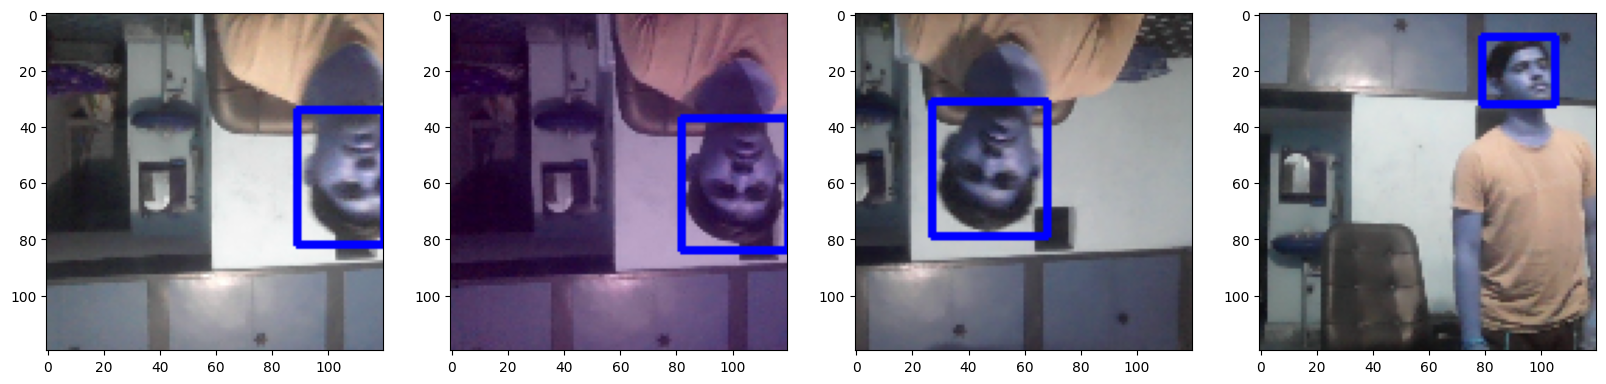

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# for idx in range(4):
#     sample_image = res[0][idx].copy()
#     sample_coords = res[1][1][idx]

#     start_point = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
#     end_point = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))

#     cv2.rectangle(sample_image, start_point, end_point, (255, 0, 0), 2)
#     ax[idx].imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

# plt.show()

File-8

In [ ]:
# from tensorflow.keras.models import Model # type: ignore
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D # type: ignore
# from tensorflow.keras.applications import VGG16 # type: ignore
# # from file_7 import train

In [ ]:
# vgg = VGG16(include_top=False)

In [ ]:
# vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# def build_model():
#     input_layer = Input(shape=(120,120,3))

#     vgg = VGG16(include_top=False)(input_layer)

#     f1 = GlobalAveragePooling2D()(vgg)
#     class1 = Dense(2048, activation='relu')(f1)
#     class2 = Dense(1, activation='sigmoid')(class1)

#     f2 = GlobalAveragePooling2D()(vgg)
#     regress1 = Dense(2048, activation='relu')(f2)
#     regress2 = Dense(4, activation='sigmoid')(regress1)

#     facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
#     return facetracker

In [ ]:
# facetracker = build_model()

In [ ]:
# facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# X, y = train.as_numpy_iterator().next()

In [ ]:
# X.shape 

(8, 120, 120, 3)

In [ ]:
# classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


In [ ]:
# classes, coords

(array([[0.5195005 ],
        [0.5777294 ],
        [0.5485424 ],
        [0.5706805 ],
        [0.60542274],
        [0.5312524 ],
        [0.5070154 ],
        [0.5977241 ]], dtype=float32),
 array([[0.45723432, 0.50296634, 0.5182689 , 0.44630232],
        [0.49177685, 0.4844791 , 0.5094695 , 0.49275562],
        [0.43710867, 0.4817556 , 0.49501035, 0.4953107 ],
        [0.4714095 , 0.4824391 , 0.51672494, 0.4506233 ],
        [0.4436314 , 0.5171838 , 0.5232925 , 0.4511227 ],
        [0.4403363 , 0.5034009 , 0.51327014, 0.43376637],
        [0.47451818, 0.49977893, 0.50084484, 0.4428752 ],
        [0.45655876, 0.52029395, 0.52749836, 0.44858488]], dtype=float32))

In [ ]:
# y

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[0.04  , 0.    , 0.4192, 0.321 ],
        [0.5156, 0.3364, 0.738 , 0.5693],
        [0.    , 0.4202, 0.1857, 0.868 ],
        [0.    , 0.2925, 0.3362, 0.6943],
        [0.5156, 0.422 , 0.81  , 0.8076],
        [0.71  , 0.725 , 0.944 , 0.933 ],
        [0.285 , 0.2522, 0.655 , 0.667 ],
        [0.4998, 0.3142, 0.8047, 0.6772]], dtype=float16))

File-9

In [ ]:
# # from file_8 import facetracker, X, y, classes, coords
# # from file_7 import train
# import tensorflow as tf

In [ ]:
# batches_per_epoch = len(train)

In [ ]:
# batches_per_epoch

870

In [ ]:
# lr_decay = (1./0.75 - 1)/batches_per_epoch

In [ ]:
# lr_decay

0.0003831417624521072

In [ ]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

c:\Users\Harshavardhan Sathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# def localization_loss(y_true, y_pred):
#     delta_cord = tf.reduce_sum(tf.square(y_true[:,:2]) - y_pred[:, :2])

#     h_true = y_true[:,3] - y_true[:, 1]
#     w_true = y_true[:,2] - y_true[:, 0]

#     h_pred = y_pred[:, 3] - y_pred[:, 1]
#     w_pred = y_pred[:, 2] - y_pred[:, 0]

#     delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
#     return delta_cord + delta_size

In [ ]:
# def localization_loss(y_true, y_pred):
#     delta_cord = tf.reduce_sum(tf.square(y_true - y_pred))

#     w_true = y_true[:, 2] - y_true[:, 0]
#     h_true = y_true[:, 3] - y_true[:, 1]
#     w_pred = y_pred[:, 2] - y_pred[:, 0]
#     h_pred = y_pred[:, 3] - y_pred[:, 1]

#     delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

#     delta_cord = tf.cast(delta_cord, tf.float32)
#     delta_size = tf.cast(delta_size, tf.float32)

#     return delta_cord + delta_size

In [ ]:
# classloss = tf.keras.losses.BinaryCrossentropy()
# regressloss = localization_loss

In [ ]:
# localization_loss(y[1], coords).numpy()

np.float32(4.1888475)

In [ ]:
# classloss(y[0], classes).numpy()

np.float32(0.5866425)

In [ ]:
# classes.shape

(8, 1)

In [ ]:
# y

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[0.04  , 0.    , 0.4192, 0.321 ],
        [0.5156, 0.3364, 0.738 , 0.5693],
        [0.    , 0.4202, 0.1857, 0.868 ],
        [0.    , 0.2925, 0.3362, 0.6943],
        [0.5156, 0.422 , 0.81  , 0.8076],
        [0.71  , 0.725 , 0.944 , 0.933 ],
        [0.285 , 0.2522, 0.655 , 0.667 ],
        [0.4998, 0.3142, 0.8047, 0.6772]], dtype=float16))

File-10

In [ ]:
# from tensorflow.keras.models import Model  # type: ignore
# import tensorflow as tf
# # from file_8 import facetracker
# # from file_9 import classloss, regressloss, optimizer
# # from file_7 import train, test, valid

In [ ]:
# class FaceTracker(Model):
#     def __init__(self, facetracker, **kwargs):
#         super().__init__(**kwargs)
#         self.model = facetracker

#     def compile(self, opt, classloss, localizationloss, **kwargs):
#         super().compile(**kwargs)
#         self.closs = classloss
#         self.lloss = localizationloss
#         self.opt = opt

#     def train_step(self, batch, **kwargs):

#         X, y = batch

#         with tf.GradientTape() as tape:
#             classes, coords = self.model(X, training=True)
#             print(f"y[0] shape: {y[0].shape}, classes shape: {classes.shape}")
#             batch_classloss = self.closs(y[0], classes)
#             batch_localizationloss = self.lloss(
#                 tf.cast(y[1], tf.float32), coords)

#             total_loss = batch_localizationloss+0.5*batch_classloss

#             grad = tape.gradient(total_loss, self.model.trainable_variables)

#         self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

#         return {"total loss": total_loss, "class loss": batch_classloss, "regression loss": batch_localizationloss}

#     def test_step(self, batch, **kwargs):
#         X, y = batch

#         classes, coords = self.model(X, training=False)

#         batch_classloss = self.closs(y[0], classes)
#         batch_regressloss = self.lloss(tf.cast(y[1], tf.float32), coords)
#         total_loss = batch_regressloss + 0.5*batch_classloss

#         return {"total loss": total_loss, "class loss": batch_classloss, "regression loss": batch_regressloss}

#     def call(self, X, **kwargs):
#         return self.model(X, **kwargs)

In [ ]:
# model = FaceTracker(facetracker)

In [ ]:
# model.summary

<bound method Model.summary of <FaceTracker name=face_tracker, built=False>>

In [ ]:
# model.compile(optimizer, classloss, regressloss)

In [ ]:
# logdir = 'logs'

In [ ]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# hist = model.fit(train, epochs=49, validation_data=valid,
#                  callbacks=[tensorboard_callback])

Epoch 1/49
y[0] shape: (None, 1), classes shape: (None, 1)
y[0] shape: (None, 1), classes shape: (None, 1)
870/870 ━━━━━━━━━━━━━━━━━━━━ 637s 702ms/step - class loss: 0.0791 - regression loss: 0.5450 - total loss: 0.5846 - val_class loss: 0.4242 - val_regression loss: 1.4181 - val_total loss: 1.6302
Epoch 2/49
 30/870 ━━━━━━━━━━━━━━━━━━━━ 9:04 649ms/step - class loss: 0.0671 - regression loss: 0.2036 - total loss: 0.2371

KeyboardInterrupt: 